In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pydataset import data
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression

1. Load the tips dataset.

In [3]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


a. Create a column named price_per_person. This should be the total bill divided by the party size.

In [9]:
df['price_per_person'] = df['total_bill'] / df['size']


In [11]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500


b. Before using any of the methods discussed in the lesson, which features do you think would be most important for predicting the tip amount?

/opt/homebrew/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


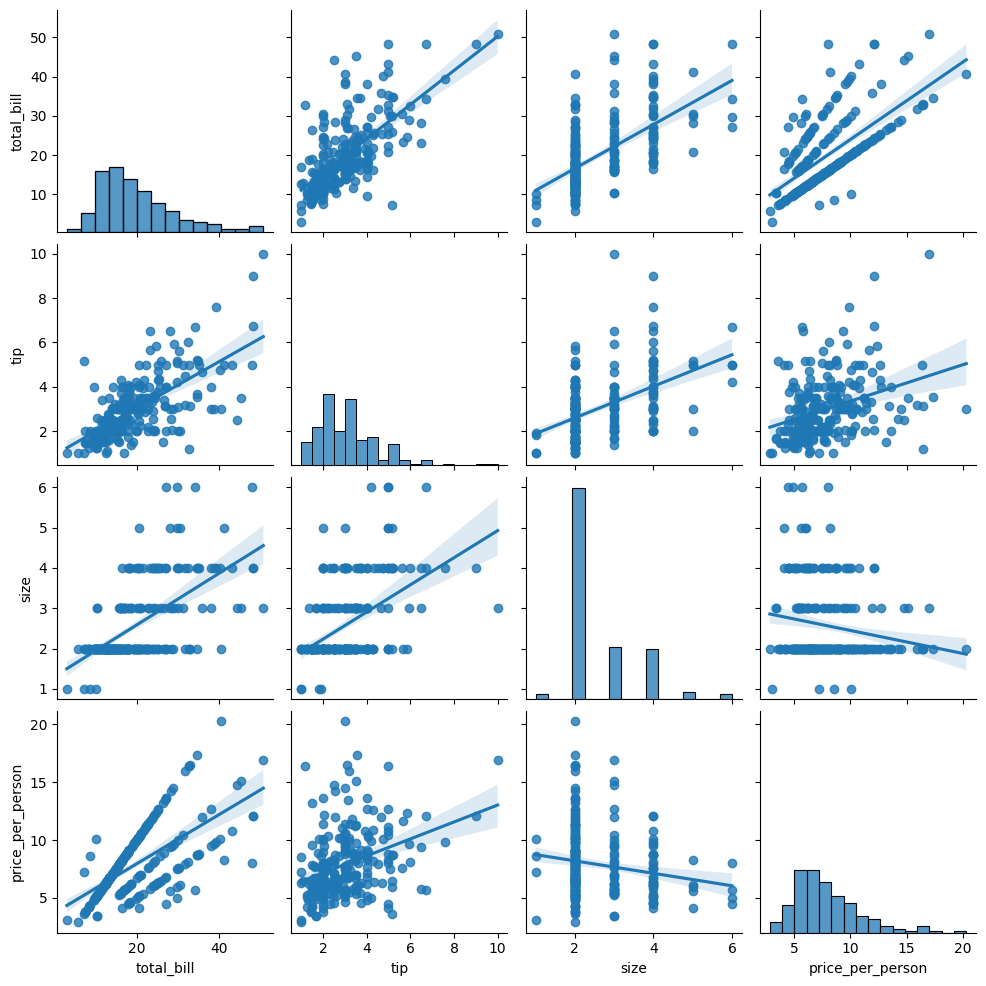

In [13]:
sns.pairplot(df, kind = 'reg')
plt.show()

Total_bill appear to have a stronger correlation

we can confirm with .corr()


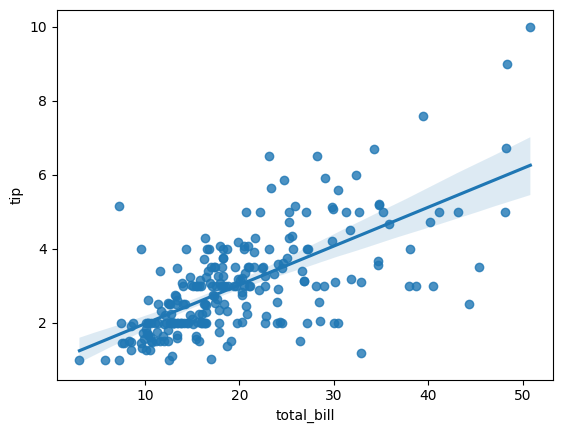

In [20]:
sns.regplot(x='total_bill', y='tip', data=df)
plt.show()

 - we need to create dummy variable 
 - In order to use RFE, we can't have 'object' datatypes
-  we also need dummy in order to scale. Scaler doesnot know what objects are It won't get what "female' or 'Saturday' mean

In [23]:
dummy_tips = pd.get_dummies(df[['sex', 'smoker', 'day', 'time' ]], drop_first = True)

In [24]:
dummy_tips.head()

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,False,False,False,True,False,False
2,True,False,False,True,False,False
3,True,False,False,True,False,False
4,True,False,False,True,False,False
5,False,False,False,True,False,False


In [26]:
dummy_tips = pd.get_dummies(df[['sex', 'smoker', 'day', 'time']], drop_first=True)
dummy_tips = dummy_tips.astype(int)
dummy_tips.head()

,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,0,0,0,1,0,0
2,1,0,0,1,0,0
3,1,0,0,1,0,0
4,1,0,0,1,0,0
5,0,0,0,1,0,0


In [28]:
tips = pd.concat([df, dummy_tips], axis = 1)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
1,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,0,0,0,1,0,0
2,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,1,0,0,1,0,0
3,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,1,0,0,1,0,0
4,23.68,3.31,Male,No,Sun,Dinner,2,11.840000,1,0,0,1,0,0
5,24.59,3.61,Female,No,Sun,Dinner,4,6.147500,0,0,0,1,0,0
